In [111]:
import numpy as np
from matplotlib import pyplot as plt
from math import isnan
import math

In [72]:
data = np.loadtxt('data.txt', delimiter=',')
predictions = np.loadtxt('pdf.txt', delimiter=',')
plane_data = predictions[1]
bird_data = predictions[0]
x_axis = np.linspace(0, len(predictions[0]) - 1, len(predictions[0]))

first pt is 30.5380413794783
61
bird prob: 0.0219439895569165
plane prob: 0.000523858265910128


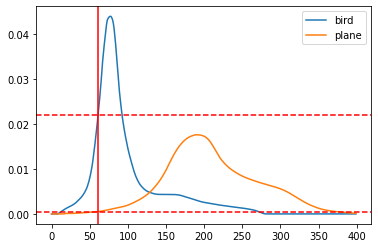

In [73]:
first_pt = data[0][0]
print('first pt is ' + str(first_pt))
# convert to correct index
ind = round(first_pt * 2)
print(ind)
bird_prob = bird_data[ind]
plane_prob = plane_data[ind]

plt.plot(x_axis, bird_data, label='bird')
plt.plot(x_axis, plane_data, label='plane')
plt.axhline(y=bird_prob, linestyle='--', color='r')
plt.axhline(y=plane_prob, linestyle='--', color='r')
plt.axvline(x=ind, linestyle='-', color='r')
plt.legend()

print("bird prob: " + str(bird_prob))
print("plane prob: " + str(plane_prob))


avg plane likelihood: 0.0149513070858021
avg bird likelihood: 0.00420438729564525
ind avg: 167


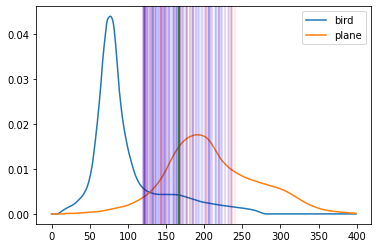

In [89]:
plt.plot(x_axis, bird_data, label='bird')
plt.plot(x_axis, plane_data, label='plane')
plt.legend()

def get_plane_bird_prob(data_pt, plane_data, bird_data):
    ind = round(data_pt * 2)
    return plane_data[ind], bird_data[ind], ind



    return plane_data[ind], bird_data[ind], ind



# init
classified_as_plane = False
plane_prior = 0.5

tally_above_129 = 0
tally_below_129 = 0
c = 'r'
total = 0
num_valid_pts = 0

for i in range(len(data[0])):
    curr_pt = data[4][i]
    if isnan(curr_pt):
        continue
    total += curr_pt
    num_valid_pts += 1
    curr_avg = total / num_valid_pts

    c = 'r' if i < 100 else 'b'
    plane_likely, bird_likely, ind = get_plane_bird_prob(curr_pt, plane_data, bird_data)
    plt.axvline(x=ind, linestyle='-', color=c, alpha=0.1)
    if ind < 129:
        tally_below_129 += 1
    else:
        tally_above_129 += 1

plane_likely_avg, bird_likely_avg, avg_ind = get_plane_bird_prob(curr_avg, plane_data, bird_data)
print("avg plane likelihood: " + str(plane_likely_avg))
print("avg bird likelihood: " + str(bird_likely_avg))
print("ind avg: " + str(avg_ind))

plt.axvline(x=avg_ind, linestyle='-', color='g')
    
# print("below 129: " + str(tally_below_129))
# print("above 129: " + str(tally_above_129))

In [46]:
# find where the lines intersect
for i in range(len(predictions[0])):
    if predictions[0][i] - predictions[1][i] < 0.0001:
        print(i)

0
1
2
3
4
5
6
7
8
9
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373


In [110]:
gt = [0, 1, 0, 0, 0, 1, 1, 1, 1, 0]


def find_avg_change_in_v(sample, plane_data, bird_data):
    start = False
    prev = 0
    total_change = 0
    num_valid_pts = 0
    for i, curr in enumerate(sample):
        if isnan(curr):
            continue
        num_valid_pts += 1
        if not start:
            prev = curr
            start = True
            continue
        curr_change = abs(curr - prev)
        total_change += curr_change
        curr_avg_change = total_change / num_valid_pts
    return curr_avg_change

bird_total_avg_change = 0
plane_total_avg_change = 0
plane_count = 0
bird_count = 0

for i, curr_sample in enumerate(data):
# for i in range(1):
    avg_change = find_avg_change_in_v(curr_sample, plane_data, bird_data)

    if gt[i]:
        plane_total_avg_change += avg_change
        plane_count += 1
    else:
        bird_total_avg_change += avg_change
        bird_count += 1


    print("curr track avg_change " + str(i + 1) + " (plane): ", end = "") if gt[i] else print("curr track avg_change " + str(i + 1) + " (bird): ", end = "")
    print(avg_change)


print("plane avg change: " + str(plane_total_avg_change / plane_count))
print("bird avg change: " + str(bird_total_avg_change / bird_count))



curr track avg_change 1 (bird): 8.74735950384887
curr track avg_change 2 (plane): 0.5182434710935793
curr track avg_change 3 (bird): 8.895608211868911
curr track avg_change 4 (bird): 15.020233300724618
curr track avg_change 5 (bird): 15.198885862669707
curr track avg_change 6 (plane): 0.5752408603097249
curr track avg_change 7 (plane): 0.5164326830777917
curr track avg_change 8 (plane): 9.681886106700105
curr track avg_change 9 (plane): 0.777778995372013
curr track avg_change 10 (bird): 0.5710483909788877
plane avg change: 2.413916423310643
bird avg change: 9.6866270540182


In [121]:
# calc the running average change
def sigmoind(x):
    exp = - (0.25 * x - 1.5)
    denom = 1 + math.e ** exp
    return 1 / denom

def running_avg_change(sample, weight):
    start = False
    prev = 0
    total_change = 0
    num_valid_pts = 0
    for i, curr in enumerate(sample):
        if isnan(curr):
            continue
        num_valid_pts += 1
        if not start:
            prev = curr
            start = True
            continue
        curr_change = abs(curr - prev)
        total_change += curr_change
        curr_avg_change = total_change / num_valid_pts
    return curr_avg_change

print(sigmoind(15))

0.9046505351008904
